# Katib - Exemplo Básico

- https://github.com/kubeflow/katib/tree/master/examples/v1beta1/sdk

### O Katib também faz pesquisa de arquitetura de redes neurais e também permite criar experimentos 

In [1]:
!pip install kubeflow-katib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [22]:
from kubeflow import katib

NAMESPACE="ambientelivre"
EXPERIMENT_NAME="maximizando"

# Criamos a função objetivo, neste caso, 3a-b^3
def objective(parameters):

    import time
    time.sleep(5) # Para dar um pequeno delay na execução
    
    result = 3*int(parameters["a"]) - float(parameters["b"]) ** 3
    print(f"result={result}")

    
# Step 2. Criamos o espaço de busca dos hiperparâmetros
parameters = {
    "a": katib.search.int(min=10, max=20),
    "b": katib.search.double(min=0.1, max=0.2)
}

In [23]:
# Instanciamos o Katibclient e iniciamos um experimento de otimização (tunning)
client = katib.KatibClient()

client.tune(
    namespace=NAMESPACE,
    name=EXPERIMENT_NAME,
    base_image="python:3.9", # Por padrão 'docker.io/tensorflow/tensorflow:2.11.0'
    algorithm_name="random",
    objective_type="maximize", # minimize
    objective=objective,
    # objective_goal= no caso de buscarmos por exemplo a acurácia de um modelo
    parameters=parameters, # Dict[str, Any]
    objective_metric_name="result",
    max_trial_count=20,
    parallel_trial_count=5,
    max_failed_trial_count=0, # nenhuma tentativa deve falhar
    packages_to_install=['sklearn'] #os pacotes são instalados antes de calcular a função objetivo
)

Experiment ambientelivre/maximizando has been created


In [24]:
# Selecionando a melhor combinação de hiperparâmetros
print(client.get_optimal_hyperparameters(name=EXPERIMENT_NAME, namespace=NAMESPACE))

None


In [25]:
# Coletando todas as informações a respeito do experimento
print(client.get_experiment(name=EXPERIMENT_NAME, namespace=NAMESPACE))

{'api_version': 'kubeflow.org/v1beta1',
 'kind': 'Experiment',
 'metadata': {'annotations': None,
              'creation_timestamp': datetime.datetime(2023, 4, 14, 19, 25, 24, tzinfo=tzutc()),
              'deletion_grace_period_seconds': None,
              'deletion_timestamp': None,
              'finalizers': ['update-prometheus-metrics'],
              'generate_name': None,
              'generation': 1,
              'labels': None,
              'managed_fields': [{'api_version': 'kubeflow.org/v1beta1',
                                  'fields_type': 'FieldsV1',
                                  'fields_v1': {'f:spec': {'.': {},
                                                           'f:algorithm': {'.': {},
                                                                           'f:algorithmName': {}},
                                                           'f:maxFailedTrialCount': {},
                                                           'f:maxTrialCount': {},

In [18]:
# Listando os experimentos
print(client.list_experiments(namespace=NAMESPACE))

[{'api_version': 'kubeflow.org/v1beta1',
 'kind': 'Experiment',
 'metadata': {'annotations': None,
              'creation_timestamp': datetime.datetime(2023, 4, 14, 19, 22, 53, tzinfo=tzutc()),
              'deletion_grace_period_seconds': None,
              'deletion_timestamp': None,
              'finalizers': ['update-prometheus-metrics'],
              'generate_name': None,
              'generation': 1,
              'labels': None,
              'managed_fields': [{'api_version': 'kubeflow.org/v1beta1',
                                  'fields_type': 'FieldsV1',
                                  'fields_v1': {'f:spec': {'.': {},
                                                           'f:algorithm': {'.': {},
                                                                           'f:algorithmName': {}},
                                                           'f:maxFailedTrialCount': {},
                                                           'f:maxTrialCount': {}

In [19]:
# Listando as tentativas
print(client.list_trials(namespace=NAMESPACE))

[{'api_version': 'kubeflow.org/v1beta1',
 'kind': 'Trial',
 'metadata': {'annotations': None,
              'creation_timestamp': datetime.datetime(2023, 4, 14, 19, 23, 54, tzinfo=tzutc()),
              'deletion_grace_period_seconds': None,
              'deletion_timestamp': None,
              'finalizers': ['clean-metrics-in-db'],
              'generate_name': None,
              'generation': 1,
              'labels': {'katib.kubeflow.org/experiment': 'maximizando'},
              'managed_fields': [{'api_version': 'kubeflow.org/v1beta1',
                                  'fields_type': 'FieldsV1',
                                  'fields_v1': {'f:metadata': {'f:finalizers': {'.': {},
                                                                                'v:"clean-metrics-in-db"': {}},
                                                               'f:labels': {'.': {},
                                                                            'f:katib.kubeflow.org/ex

In [21]:
# Tentantivas que deram certo
print(client.get_success_trial_details(namespace=NAMESPACE))

[{'name': 'random-4rrvc2gm', 'parameter_assignments': [{'name': 'lr', 'value': '0.018821636476754007'}, {'name': 'num-layers', 'value': '3'}, {'name': 'optimizer', 'value': 'sgd'}], 'metrics': [{'latest': '0.976712',
 'max': '0.977010',
 'min': '0.958002',
 'name': 'Validation-accuracy'}, {'latest': '0.993387',
 'max': '0.993387',
 'min': '0.913380',
 'name': 'Train-accuracy'}]}, {'name': 'random-7bjhjtz4', 'parameter_assignments': [{'name': 'lr', 'value': '0.01350175486461313'}, {'name': 'num-layers', 'value': '3'}, {'name': 'optimizer', 'value': 'sgd'}], 'metrics': [{'latest': '0.978205',
 'max': '0.979299',
 'min': '0.947552',
 'name': 'Validation-accuracy'}, {'latest': '0.992554',
 'max': '0.992554',
 'min': '0.906183',
 'name': 'Train-accuracy'}]}, {'name': 'random-7s4lhsrz', 'parameter_assignments': [{'name': 'lr', 'value': '0.015777853341305104'}, {'name': 'num-layers', 'value': '3'}, {'name': 'optimizer', 'value': 'ftrl'}], 'metrics': [{'latest': '0.112323',
 'max': '0.112373',

In [20]:
# Excluindo o experimento
client.delete_experiment(name=EXPERIMENT_NAME, namespace=NAMESPACE)

Experiment ambientelivre/maximizando has been deleted


# Katib - Exemplo de treino e otimização de um modelo Tensorflow

- https://github.com/kubeflow/katib/blob/master/examples/v1beta1/sdk/tune-train-from-func.ipynb

- Neste caso, estamos lidando com um modelo de Rede Neural Convolucional (Convolutional Neural Network (CNN)) para reconhecer números escritos à mão utilizando o dataset do MNIST.

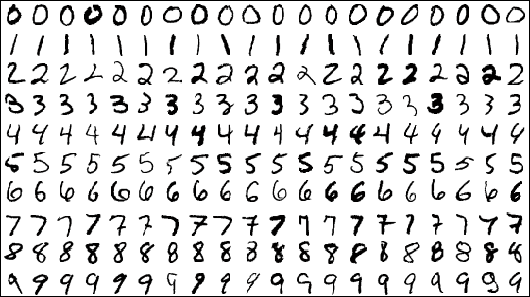

In [27]:
def train_mnist_model(parameters):
    import tensorflow as tf
    import numpy as np
    import logging

    logging.basicConfig(
        format="%(asctime)s %(levelname)-8s %(message)s",
        datefmt="%Y-%m-%dT%H:%M:%SZ",
        level=logging.INFO,
    )
    logging.info("--------------------------------------------------------------------------------------")
    logging.info(f"Input Parameters: {parameters}")
    logging.info("--------------------------------------------------------------------------------------\n\n")


    # Get HyperParameters from the input params dict.
    lr = float(parameters["lr"])
    num_epoch = int(parameters["num_epoch"])

    # Set dist parameters and strategy.
    is_dist = parameters["is_dist"]
    num_workers = parameters["num_workers"]
    batch_size_per_worker = 64
    batch_size_global = batch_size_per_worker * num_workers
    strategy = tf.distribute.MultiWorkerMirroredStrategy(
        communication_options=tf.distribute.experimental.CommunicationOptions(
            implementation=tf.distribute.experimental.CollectiveCommunication.RING
        )
    )

    # Callback class for logging training.
    # Katib parses metrics in this format: <metric-name>=<metric-value>.
    class CustomCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            logging.info(
                "Epoch {}/{}. accuracy={:.4f} - loss={:.4f}".format(
                    epoch+1, num_epoch, logs["accuracy"], logs["loss"]
                )
            )

    # Prepare MNIST Dataset.
    def mnist_dataset(batch_size):
        (x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
        x_train = x_train / np.float32(255)
        y_train = y_train.astype(np.int64)
        train_dataset = (
            tf.data.Dataset.from_tensor_slices((x_train, y_train))
            .shuffle(60000)
            .repeat()
            .batch(batch_size)
        )
        return train_dataset

    # Build and compile CNN Model.
    def build_and_compile_cnn_model():
        model = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(28, 28)),
                tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
                tf.keras.layers.Conv2D(32, 3, activation="relu"),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(128, activation="relu"),
                tf.keras.layers.Dense(10),
            ]
        )
        model.compile(
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
            metrics=["accuracy"],
        )
        return model
    
    # Download Dataset.
    dataset = mnist_dataset(batch_size_global)

    # For dist strategy we should build model under scope().
    if is_dist:
        logging.info("Running Distributed Training")
        logging.info("--------------------------------------------------------------------------------------\n\n")
        with strategy.scope():
            model = build_and_compile_cnn_model()
    else:
        logging.info("Running Single Worker Training")
        logging.info("--------------------------------------------------------------------------------------\n\n")
        model = build_and_compile_cnn_model()
    
    # Start Training.
    model.fit(
        dataset,
        epochs=num_epoch,
        steps_per_epoch=70,
        callbacks=[CustomCallback()],
        verbose=0,
    )

In [ ]:
# # Caso fossemos treinar o algoritmo localmente com determinados hiperparâmetros:
# parameters = {
#     "lr": "0.1",
#     "num_epoch": "2",
#     "is_dist": False,
#     "num_workers": 1
# }

# train_mnist_model(parameters)

# # FAZER USANDO KUBEFLOW PIPELINE



In [28]:
from kubeflow import katib

NAMESPACE="ambientelivre"
EXPERIMENT_NAME="tensorflow-tunning"
BASE_IMAGE="docker.io/tensorflow/tensorflow:2.11.0"

# Set parameters with their distribution for HyperParameter Tuning with Katib.
parameters = {
    "lr": katib.search.double(min=0.1, max=0.2),
    "num_epoch": katib.search.int(min=10, max=15),
    "is_dist": False,
    "num_workers": 1
}

client = katib.KatibClient()

client.tune(
    namespace=NAMESPACE,
    name=EXPERIMENT_NAME,
    base_image=BASE_IMAGE,
    objective=train_mnist_model, # Objective function.
    parameters=parameters, # HyperParameters to tune.
    algorithm_name="cmaes", # Alorithm to use.
    objective_metric_name="accuracy", # Katib is going to optimize "accuracy".
    additional_metric_names=["loss"], # Katib is going to collect these metrics in addition to the objective metric.
    max_trial_count=12, # Trial Threshold.
    parallel_trial_count=2,
)

Experiment ambientelivre/tensorflow-tunning has been created


In [34]:
status = client.is_experiment_succeeded(name=EXPERIMENT_NAME, namespace=NAMESPACE)
print(f"Katib Experiment is Succeeded: {status}\n")

best_hps = client.get_optimal_hyperparameters(name=EXPERIMENT_NAME, namespace=NAMESPACE)

if best_hps != None:
    print("Current Optimal Trial\n")
    print(best_hps)
    
    for hp in best_hps.parameter_assignments:
        if hp.name == "lr":
            best_lr = hp.value
        else:
            best_num_epoch = hp.value

Katib Experiment is Succeeded: True

Current Optimal Trial

{'best_trial_name': 'tensorflow-tunning-zjchhjfn',
 'observation': {'metrics': [{'latest': '0.9694',
                              'max': '0.9694',
                              'min': '0.7167',
                              'name': 'accuracy'},
                             {'latest': '0.1087',
                              'max': '0.9283',
                              'min': '0.1087',
                              'name': 'loss'}]},
 'parameter_assignments': [{'name': 'lr', 'value': '0.17016692449867332'},
                           {'name': 'num_epoch', 'value': '13'}]}
